/var/folders/nl/982jm5nj215dg_t3m00648hw0009sw/T/ipykernel_6217/1909492207.py:33: UserWarning: The label '_ignore' of <matplotlib.collections.PolyCollection object at 0x12b68ff70> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=["2-gram-set", "_ignore", "K-means Baseline","_ignore", "3-gram-set", "_ignore", "_3-gram-set-baseline", "_ignore","2-gram-concat", "_ignore", "_2-gram-concat-baseline","_ignore","3-gram-concat", "_ignore", "_3-gram-concat-baseline","_ignore"])
/var/folders/nl/982jm5nj215dg_t3m00648hw0009sw/T/ipykernel_6217/1909492207.py:33: UserWarning: The label '_ignore' of <matplotlib.collections.PolyCollection object at 0x12b6d8bb0> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=["2-gram-set", "_ignore", "K-means Baseline","_ignore", "3-gram-set", "_ignore", "_3-gram-set-baseline", "_ignore","2-gram-concat", "_ignore", "_2-gram-concat-baseline","_ignore","3-gram-concat", "_ignore", "_3-gram-concat-baseline","_ignore"])
/v

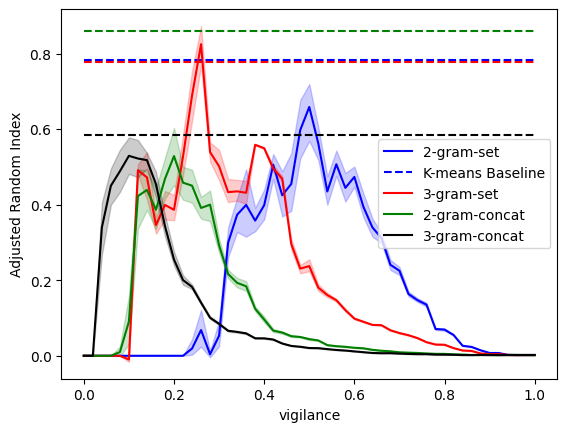

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from conf import ART_VIGILANCE, ART_LEARNING_RATE, INFLECTION_CLASSES, N_INFLECTION_CLASSES, OUTPUT_DIR, INITIAL_CLUSTERS, CONFIG_STRING, VIGILANCE_RANGE

# rep_kmeans_ARI_2_pool=np.ones((1,len(VIGILANCE_RANGE)))*0.782 #This is obtained from one baseline run
# rep_kmeans_ARI_3_pool=np.ones((1,len(VIGILANCE_RANGE)))*0.778 #This is obtained from one baseline run


def addLine(Ngram, Concat, color, baseline_score):
    used_colors=["b", "r", "g","k"]
    filename=f'output/cluster_stats_--use_only_3PL=False---squeeze_into_verbs==True---Concat_verb_features={Concat}---CommonFeat0=False---Ngram={Ngram}.csv'
    df_results = pd.read_csv(filename)

    df_melt_scores = pd.melt(df_results, id_vars=["vigilance", "run", "batch"], value_vars=["ari"], var_name="metric", value_name="score")
    # df_melt_scores = pd.melt(df_results, id_vars=["vigilance", "run", "batch"], value_vars=["ri","ari", "nmi", "ami"], var_name="metric", value_name="score")

    from matplotlib import cm

    sns.lineplot(data=df_melt_scores, x="vigilance",
                    y="score", color=used_colors[color])
    # 
    baseline_rep=np.ones((1,len(VIGILANCE_RANGE)))*baseline_score #This is obtained from one baseline run
    # rep_kmeans_AMI=np.ones((1,len(VIGILANCE_RANGE)))*0.835 #This is obtained from one baseline run
    sns.lineplot(x=VIGILANCE_RANGE,
                    y=baseline_rep[0], dashes=True, color=used_colors[color], linestyle='--')
    
addLine(2, False, 0, 0.782)
addLine(3, False, 1, 0.778)
addLine(2, True, 2, 0.86)
addLine(3, True, 3, 0.5852)
plt.legend(labels=["2-gram-set", "_ignore", "K-means Baseline","_ignore", "3-gram-set", "_ignore", "_3-gram-set-baseline", "_ignore","2-gram-concat", "_ignore", "_2-gram-concat-baseline","_ignore","3-gram-concat", "_ignore", "_3-gram-concat-baseline","_ignore"])
plt.ylabel('Adjusted Random Index')
plt.savefig("Poster_vigilances.pdf")


In [23]:
plt

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>